In [32]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [33]:
# take out first sheet from xlsx file
data = pd.read_excel('Crowdfunding campaign.xlsx', sheet_name=0)
data.drop('delivery', axis=1, inplace=True)
# drop the null values
data.dropna(inplace=True)

# data.dropna(subset=['cid'], inplace=True)
# drop duplicates based on cid
# data.drop_duplicates(subset=['cid'],inplace=True)

# drop the rows that are duplicates
data.drop_duplicates(inplace=True)
data

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0
...,...,...,...,...,...,...,...,...,...,...
219,248410,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0
220,248622,0,10000,1.005000,0,1,0.0,New York,2012,0.0
221,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0
222,256062,1,2000,8.188500,1,0,0.0,Georgia,2013,0.0


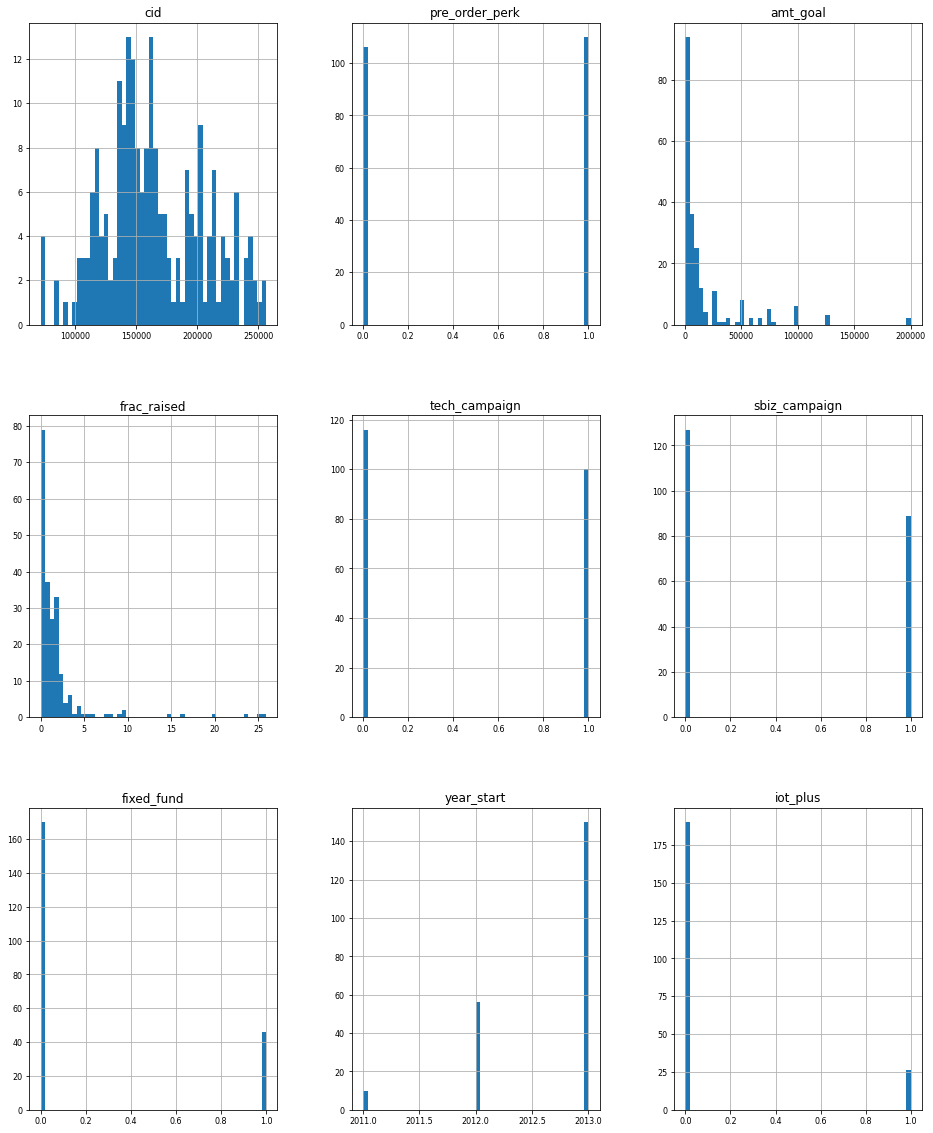

In [34]:
data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

In [26]:
data.describe()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,amt_goal_standardized
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,2.160000e+02
mean,164216.592593,0.509259,17533.518519,1.801634,0.462963,0.412037,0.212963,2012.648148,0.12037,-7.452886e-17
std,41130.626378,0.501076,31481.563736,3.699447,0.499785,0.493345,0.410353,0.567570,0.32615,1.002323e+00
min,71762.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.00000,-5.423201e-01
25%,137707.750000,0.000000,1462.500000,0.008788,0.000000,0.000000,0.000000,2012.000000,0.00000,-5.116757e-01
50%,158916.000000,1.000000,5000.000000,1.019715,0.000000,0.000000,0.000000,2013.000000,0.00000,-3.990473e-01
75%,194429.500000,1.000000,15000.000000,1.750967,1.000000,1.000000,0.000000,2013.000000,0.00000,-8.066320e-02
max,256198.000000,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.00000,5.809442e+00


In [35]:
# standardise the year
data['year'] = data['year_start'].apply(lambda x: x-2010)
data

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,year
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,1
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,2
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,2
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,2
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
219,248410,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0,2
220,248622,0,10000,1.005000,0,1,0.0,New York,2012,0.0,2
221,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,2
222,256062,1,2000,8.188500,1,0,0.0,Georgia,2013,0.0,3


In [23]:
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
data['amt_goal_standardized'] = scaler.fit_transform(data['amt_goal'].values.reshape(-1,1))
data

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,amt_goal_standardized
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,-0.478643
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,-0.510482
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,2.625602
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,-0.335370
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,-0.494563
...,...,...,...,...,...,...,...,...,...,...,...
219,248410,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0,-0.510482
220,248622,0,10000,1.005000,0,1,0.0,New York,2012,0.0,-0.239855
221,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,-0.399047
222,256062,1,2000,8.188500,1,0,0.0,Georgia,2013,0.0,-0.494563


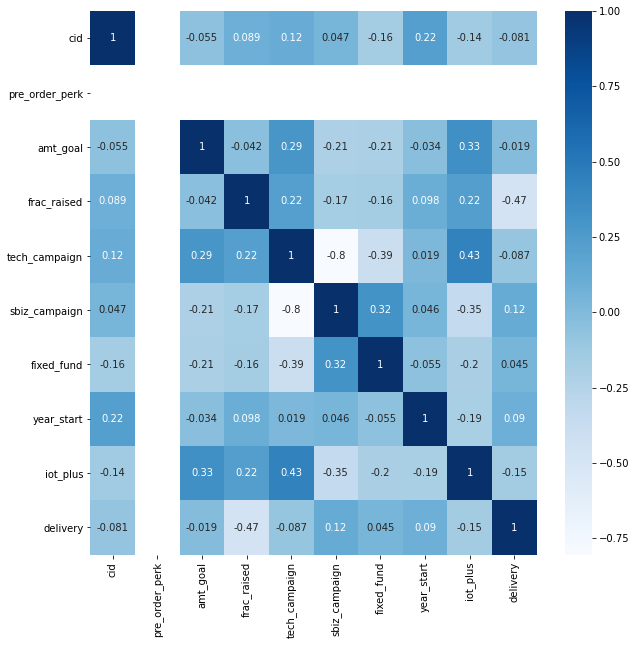

In [5]:
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.gcf().set_size_inches(10, 10)

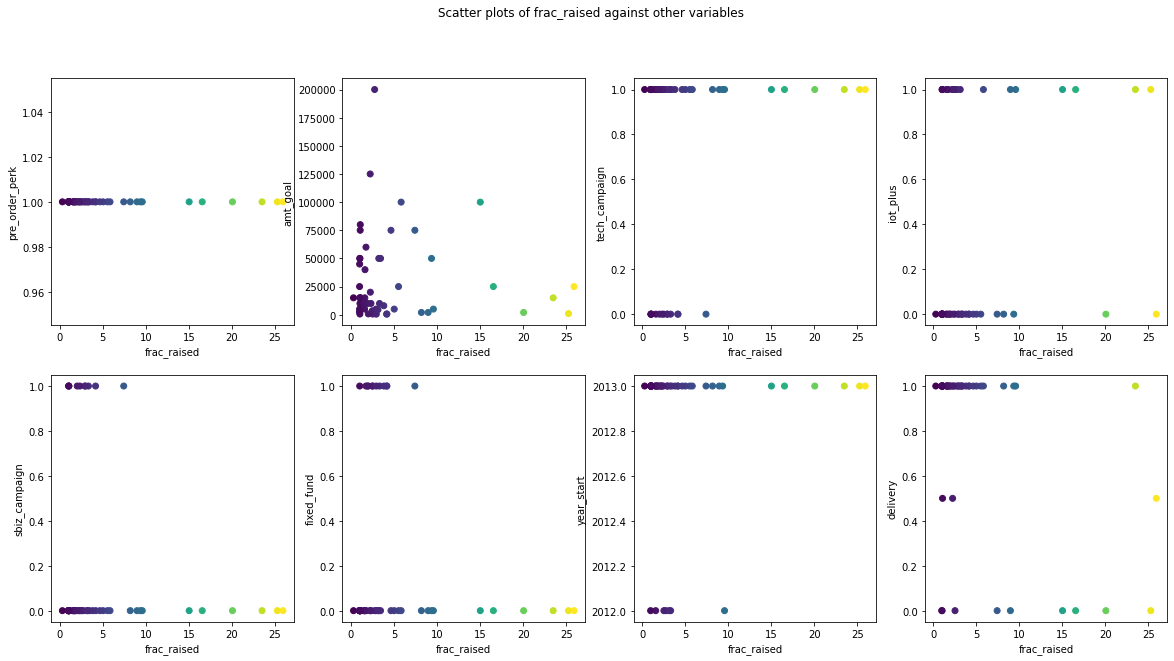

In [6]:
# add multiple plots in one figure
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0, 0].scatter(data["frac_raised"], data["pre_order_perk"], c=data["frac_raised"])
ax[0, 0].set_xlabel("frac_raised")
ax[0, 0].set_ylabel("pre_order_perk")
ax[0, 1].scatter(data["frac_raised"], data["amt_goal"], c=data["frac_raised"])
ax[0, 1].set_xlabel("frac_raised")
ax[0, 1].set_ylabel("amt_goal")
ax[0, 2].scatter(data["frac_raised"], data["tech_campaign"], c=data["frac_raised"])
ax[0, 2].set_xlabel("frac_raised")
ax[0, 2].set_ylabel("tech_campaign")
ax[1, 0].scatter(data["frac_raised"], data["sbiz_campaign"], c=data["frac_raised"])
ax[1, 0].set_xlabel("frac_raised")
ax[1, 0].set_ylabel("sbiz_campaign")
ax[1, 1].scatter(data["frac_raised"], data["fixed_fund"], c=data["frac_raised"])
ax[1, 1].set_xlabel("frac_raised")
ax[1, 1].set_ylabel("fixed_fund")
ax[1, 2].scatter(data["frac_raised"], data["year_start"], c=data["frac_raised"])
ax[1, 2].set_xlabel("frac_raised")
ax[1, 2].set_ylabel("year_start")
ax[0, 3].scatter(data["frac_raised"], data["iot_plus"], c=data["frac_raised"])
ax[0, 3].set_xlabel("frac_raised")
ax[0, 3].set_ylabel("iot_plus")
ax[1, 3].scatter(data["frac_raised"], data["delivery"], c=data["frac_raised"])
ax[1, 3].set_xlabel("frac_raised")
ax[1, 3].set_ylabel("delivery")
# add a title to the figure
fig.suptitle("Scatter plots of frac_raised against other variables")
plt.show()

In [36]:
target = data['frac_raised']

# maybe remove state? because it is a categorical variable
predictor = data.drop(columns=['frac_raised', 'cid', 'state', 'year_start'])
# predictor = data.iloc[:,data.columns!='frac_raised']

In [25]:
predictor

,pre_order_perk,amt_goal,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
17,1,600,0,0,1.0,2012,0.0,0.0
26,1,10000,0,1,1.0,2012,0.0,1.0
30,1,45000,1,0,0.0,2013,0.0,1.0
37,1,200000,1,0,0.0,2012,1.0,1.0
38,1,1000,1,0,0.0,2013,1.0,0.0
39,1,125000,1,0,0.0,2013,1.0,1.0
46,1,10000,1,0,0.0,2013,1.0,1.0
54,1,5000,1,0,1.0,2013,0.0,1.0
55,1,60000,1,0,1.0,2013,1.0,1.0
58,1,20000,1,0,0.0,2013,1.0,0.5


In [37]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=0)

In [39]:
# Fit a logistic regression model on the training set
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = linreg.predict(X_test)

# RMSE
print(f'RMSE is {mean_squared_error(y_test, y_pred, squared = False)}')

RMSE is 3.432676145985432


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

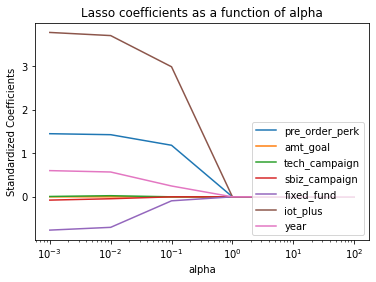

In [42]:
# fit lasso regression on model
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs, label=['pre_order_perk', 'amt_goal', 'tech_campaign', 'sbiz_campaign', 'fixed_fund', 'iot_plus', 'year'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='lower right')
plt.title('Lasso coefficients as a function of alpha')

In [48]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV
param_grid_new = {
    'n_jobs':[100,150],
}

lr = LinearRegression()
grid_search_rf = GridSearchCV(estimator = lr, param_grid = param_grid_new, cv=3, verbose=1)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


{'n_jobs': 100}

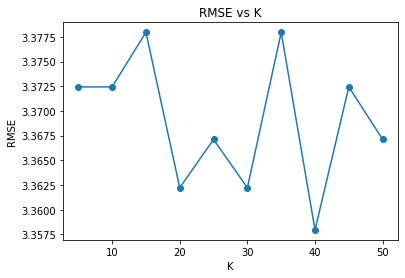

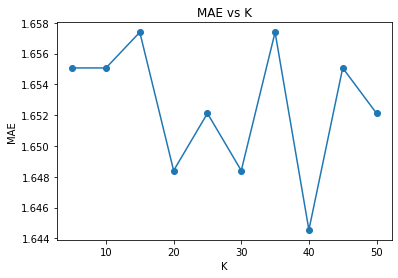

In [65]:
# Create a list of alphas to cross-validate over
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 4, 100)

# Create a ridge regressor
ridge = Ridge()
ridge_mse_list = []
ridge_mae_list = []
K = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for k in K:
    # Use RidgeCV to perform 10-fold cross-validation
    ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=k)

    # Fit the regressor to the data
    ridge_cv.fit(X_train, y_train)

    # Compute and print the coefficients
    ridge_coefficients = ridge_cv.coef_
    # print(f'the coefficients are: {ridge_coefficients}')

    # Compute and print the test error
    ridge_mse = mean_squared_error(y_test, ridge_cv.predict(X_test), squared=False)
    ridge_mse_list.append(ridge_mse)
    # print(f'the ridge rmse is: {ridge_mse}')
    
    ridge_mae_list.append(mean_absolute_error(y_test, ridge_cv.predict(X_test)))

    # Compute and print the alpha value
    ridge_alpha = ridge_cv.alpha_
    # print(f'the alpha is: {ridge_alpha}')
    
import matplotlib.pyplot as plt
plt.plot(K, ridge_mse_list, marker = 'o')
plt.title('RMSE vs K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

plt.plot(K, ridge_mae_list, marker = 'o')
plt.title('MAE vs K')
plt.xlabel('K')
plt.ylabel('MAE')
plt.show()

In [63]:
# lowest index 
ridge_mse_list.index(min(ridge_mse_list))
# don't think mae makes sense here?

16

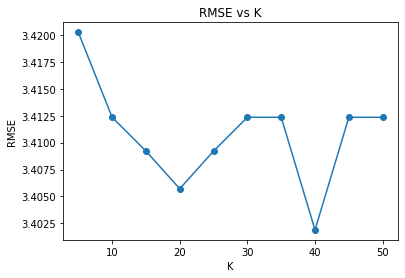

In [68]:
# Create a list of alphas to cross-validate over
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 4, 100)

# Create a ridge regressor
lasso = Lasso()
lasso_mse_list = []
K = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for k in K:
    # Use RidgeCV to perform 10-fold cross-validation
    lasso_cv = LassoCV(alphas=alphas, cv=k)

    # Fit the regressor to the data
    lasso_cv.fit(X_train, y_train)

    # Compute and print the test error
    lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test), squared=False)
    lasso_mse_list.append(lasso_mse)    
    
import matplotlib.pyplot as plt
plt.plot(K, lasso_mse_list, marker = 'o')
plt.title('RMSE vs K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()